# Do you know your stroke risk?

Source of the data: https://www.sciencedirect.com/science/article/pii/S0933365719302295?via%3Dihub
Liu, Tianyu; Fan, Wenhui; Wu, Cheng (2019), “Data for: A hybrid machine learning approach to cerebral stroke prediction based on imbalanced medical-datasets”, Mendeley Data, V1, doi: 10.17632/x8ygrw87jw.1

The medical dataset contains 43,400 records of potential patients which includes 783 occurrences of stroke. 

Cerebral stroke has become a significant global public health issue. The ideal solution to this concern is to prevent in advance by controlling related metabolic factors. However, it is difficult for medical staff to decide whether special precautions are needed for a potential patient only based on the monitoring of physiological indicators unless they are obviously abnormal. This project builds a machine learning model to predict whether someone is at risk of having a stroke.

The data in each row includes numerical factors, such as age and average glucose levels, and categorical factors, such as "has heart disease" (yes or no), work type, and smoking status. This is not an exhaustive list. We use this data to determine which factors contribute to having a stroke, and among those which hold the most weight.

## Basic analysis of the input dataset

In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

# Read the golf course dataset
input_csv = pd.read_csv("data/stroke_dataset.csv", delimiter=',', skipinitialspace=True)
input_csv.shape

(43400, 12)

In [2]:
# Display the input data for preview
input_csv

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [3]:
# Check the number of unique records using groupby
csv_group = input_csv.groupby("id")
len(csv_group)

43400

In [4]:
# Count missing values for each column of the input dataset

input_csv.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [5]:
# Count values for each column of the input dataset

input_csv.notnull().sum()

id                   43400
gender               43400
age                  43400
hypertension         43400
heart_disease        43400
ever_married         43400
work_type            43400
Residence_type       43400
avg_glucose_level    43400
bmi                  41938
smoking_status       30108
stroke               43400
dtype: int64

In [6]:
# List the categorical columns present in the dataset
input_csv.select_dtypes(exclude=np.number).columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [7]:
# List the numerical columns present in the dataset
input_csv.select_dtypes(include=np.number).columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')

## gender

In [8]:
# Overview of gender
input_csv["gender"].value_counts()

Female    25665
Male      17724
Other        11
Name: gender, dtype: int64

## age

In [9]:
# Overview of age
input_csv["age"].value_counts()

51.00    738
52.00    721
53.00    701
78.00    698
50.00    694
        ... 
0.48      37
0.40      35
1.00      34
0.16      26
0.08      17
Name: age, Length: 104, dtype: int64

## hypertension

In [10]:
# Overview of hypertension
input_csv["hypertension"].value_counts()

0    39339
1     4061
Name: hypertension, dtype: int64

## heart_disease

In [11]:
# Overview of heart_disease
input_csv["heart_disease"].value_counts()

0    41338
1     2062
Name: heart_disease, dtype: int64

## ever_married

In [12]:
# Overview of ever_married
input_csv["ever_married"].value_counts()

Yes    27938
No     15462
Name: ever_married, dtype: int64

## work_type

In [13]:
# Overview of work_type
input_csv["work_type"].value_counts()

Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64

## Residence_type

In [14]:
# Overview of Residence_type
input_csv["Residence_type"].value_counts()

Urban    21756
Rural    21644
Name: Residence_type, dtype: int64

## avg_glucose_level

In [15]:
# Overview of avg_glucose_level
input_csv["avg_glucose_level"].value_counts()

82.71     19
87.07     18
72.53     18
84.40     17
90.71     17
          ..
202.11     1
121.82     1
138.99     1
152.24     1
160.00     1
Name: avg_glucose_level, Length: 12543, dtype: int64

## bmi

In [16]:
# Overview of bmi
input_csv["bmi"].value_counts()

27.7    271
27.6    267
26.8    266
26.1    265
27.1    260
       ... 
10.1      1
67.0      1
11.2      1
97.6      1
65.2      1
Name: bmi, Length: 555, dtype: int64

In [17]:
# Null bmi

print(input_csv["bmi"].isnull().sum())

1462


## Replace missing bmi data with 0

In [18]:
input_csv["bmi"] = input_csv["bmi"].fillna(0)
input_csv

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [19]:
# Create a subset data frame
subset_df = input_csv[((input_csv["id"] >= 72586) & (input_csv["id"] <= 72600))]

subset_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3009,72594,Male,63.0,0,0,Yes,Private,Urban,95.29,31.6,smokes,0
11720,72595,Male,69.0,0,0,No,Self-employed,Rural,193.03,0.0,smokes,0
16824,72593,Female,46.0,0,0,Yes,Self-employed,Rural,112.27,23.2,formerly smoked,0
19228,72587,Male,19.0,0,0,No,Private,Urban,82.92,35.8,never smoked,0
20074,72586,Female,68.0,0,1,Yes,Private,Urban,57.64,0.0,never smoked,0
21836,72590,Male,7.0,0,0,No,children,Urban,79.06,18.7,NaN,0
24953,72597,Female,13.0,0,0,No,children,Urban,77.96,24.9,never smoked,0
29823,72599,Female,82.0,1,1,Yes,Govt_job,Urban,161.99,19.6,smokes,0
30776,72592,Female,21.0,0,0,No,Govt_job,Rural,61.38,34.0,NaN,0
32496,72589,Male,50.0,0,0,Yes,Govt_job,Urban,79.81,31.9,NaN,0


## Categorize bmi

In [20]:
# Create the bins in which Data will be held
bins = [-1, 0, 18.5, 25, 30, 35, 40, 45, 50, 60, 100]

# Create the names for the five bins
group_labels = ["unknown", "<18.5", "18.5-24.9", "25-29.9", "30-34.9", "35-39.9", "40-44.9", "45-49.9", "50-59.9", ">60"]

In [21]:
input_csv["bmi group"] = pd.cut(input_csv["bmi"], bins, labels=group_labels)
input_csv

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi group
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0,<18.5
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,35-39.9
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0,<18.5
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,35-39.9
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0,18.5-24.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0,18.5-24.9
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0,50-59.9
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0,25-29.9
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0,30-34.9


In [22]:
# Create the bins in which Data will be held
bins = [-1, 0, 18.5, 25, 30, 35, 40, 45, 50, 60, 100]

# Create the names for the bins
group_labels = ["unknown", "Underweight", "Normal weight", "Overweight", "Obese Class I (Moderately obese)", "Obese Class II (Severely obese)", "Obese Class III (Very severely obese)", "Obese Class IV (Morbidly Obese)", "Obese Class V (Super Obese)", "Obese Class VI (Hyper Obese)"]

In [23]:
input_csv["bmi group 2"] = pd.cut(input_csv["bmi"], bins, labels=group_labels)
input_csv

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi group,bmi group 2
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0,<18.5,Underweight
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,35-39.9,Obese Class II (Severely obese)
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0,<18.5,Underweight
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,35-39.9,Obese Class II (Severely obese)
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0,18.5-24.9,Normal weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0,18.5-24.9,Normal weight
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0,50-59.9,Obese Class V (Super Obese)
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0,25-29.9,Overweight
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0,30-34.9,Obese Class I (Moderately obese)


In [24]:
# Creating a group based off of the bins
bmi_group = input_csv.groupby("bmi group")
bmi_group[["stroke", "hypertension", "heart_disease"]].sum()

,stroke,hypertension,heart_disease
bmi group,,,
unknown,140,391,254
<18.5,8,20,13
18.5-24.9,128,436,304
25-29.9,227,1097,611
30-34.9,164,998,485
35-39.9,69,590,243
40-44.9,30,289,100
45-49.9,13,131,28
50-59.9,4,87,21


In [25]:
# Creating a group based off of the bins
bmi_group2 = input_csv.groupby("bmi group 2")
bmi_group2[["stroke", "hypertension", "heart_disease"]].sum()

,stroke,hypertension,heart_disease
bmi group 2,,,
unknown,140,391,254
Underweight,8,20,13
Normal weight,128,436,304
Overweight,227,1097,611
Obese Class I (Moderately obese),164,998,485
Obese Class II (Severely obese),69,590,243
Obese Class III (Very severely obese),30,289,100
Obese Class IV (Morbidly Obese),13,131,28
Obese Class V (Super Obese),4,87,21


In [26]:
# Creating a group based off of the bins
bmi_group2 = input_csv.groupby("bmi group 2")
bmi_group2["age"].mean()

bmi group 2
unknown                                  53.078276
Underweight                              10.114237
Normal weight                            34.853233
Overweight                               47.783800
Obese Class I (Moderately obese)         49.837412
Obese Class II (Severely obese)          48.718568
Obese Class III (Very severely obese)    47.951928
Obese Class IV (Morbidly Obese)          46.794381
Obese Class V (Super Obese)              45.100616
Obese Class VI (Hyper Obese)             44.179775
Name: age, dtype: float64

In [27]:
# Creating a group based off of the bins
bmi_group2 = input_csv.groupby("bmi group 2")
bmi_group2["id"].count()

bmi group 2
unknown                                   1462
Underweight                               3290
Normal weight                            11157
Overweight                               11709
Obese Class I (Moderately obese)          8285
Obese Class II (Severely obese)           4245
Obese Class III (Very severely obese)     1893
Obese Class IV (Morbidly Obese)            783
Obese Class V (Super Obese)                487
Obese Class VI (Hyper Obese)                89
Name: id, dtype: int64

## smoking_status

In [28]:
# Overview of smoking_status
input_csv["smoking_status"].value_counts()

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [29]:
# Null smoking_status

print(input_csv["smoking_status"].isnull().sum())

13292


## stroke

In [30]:
# Overview of stroke
input_csv["stroke"].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

## Replace missing smoking_status data with unknown

In [31]:
input_csv

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi group,bmi group 2
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0,<18.5,Underweight
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,35-39.9,Obese Class II (Severely obese)
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0,<18.5,Underweight
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,35-39.9,Obese Class II (Severely obese)
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0,18.5-24.9,Normal weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0,18.5-24.9,Normal weight
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0,50-59.9,Obese Class V (Super Obese)
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0,25-29.9,Overweight
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0,30-34.9,Obese Class I (Moderately obese)


In [32]:
# Replacing missing data with unknown
input_csv["smoking_status"] = input_csv["smoking_status"].fillna("unknown")
input_csv

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi group,bmi group 2
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,unknown,0,<18.5,Underweight
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,35-39.9,Obese Class II (Severely obese)
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,unknown,0,<18.5,Underweight
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,35-39.9,Obese Class II (Severely obese)
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,unknown,0,18.5-24.9,Normal weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0,18.5-24.9,Normal weight
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0,50-59.9,Obese Class V (Super Obese)
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0,25-29.9,Overweight
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0,30-34.9,Obese Class I (Moderately obese)


In [33]:
# Overview of smoking_status
input_csv["smoking_status"].value_counts()

never smoked       16053
unknown            13292
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [34]:
# groupby smoking_status
smoking_group = input_csv.groupby(["smoking_status","gender","stroke"])
smoking_group.count()

id    age  hypertension  heart_disease  \
smoking_status  gender stroke                                              
formerly smoked Female 0        4019   4019          4019           4019   
                       1          98     98            98             98   
                Male   0        3247   3247          3247           3247   
                       1         123    123           123            123   
                Other  0           6      6             6              6   
never smoked    Female 0       10371  10371         10371          10371   
                       1         197    197           197            197   
                Male   0        5396   5396          5396           5396   
                       1          87     87            87             87   
                Other  0           2      2             2              2   
smokes          Female 0        3616   3616          3616           3616   
                       1          65     65            65             65   
                Male   0        2812   2812          2812           2812   
                       1          68     68            68             68   
                Other  0           1      1             1              1   
unknown         Female 0        7228   7228          7228           7228   
                       1          71     71            71             71   
                Male   0        5917   5917          5917           5917   
                       1          74     74            74             74   
                Other  0           2      2             2              2   

                               ever_married  work_type  Residence_type  \
smoking_status  gender stroke                                            
formerly smoked Female 0               4019       4019            4019   
                       1                 98         98              98   
                Male   0               3247       3247            3247   
                       1                123        123             123   
                Other  0                  6          6               6   
never smoked    Female 0              10371      10371           10371   
                       1                197        197             197   
                Male   0               5396       5396            5396   
                       1                 87         87              87   
                Other  0                  2          2               2   
smokes          Female 0               3616       3616            3616   
                       1                 65         65              65   
                Male   0               2812       2812            2812   
                       1                 68         68              68   
                Other  0                  1          1               1   
unknown         Female 0               7228       7228            7228   
                       1                 71         71              71   
                Male   0               5917       5917            5917   
                       1                 74         74              74   
                Other  0                  2          2               2   

                               avg_glucose_level    bmi  bmi group  \
smoking_status  gender stroke                                        
formerly smoked Female 0                    4019   4019       4019   
                       1                      98     98         98   
                Male   0                    3247   3247       3247   
                       1                     123    123        123   
                Other  0                       6      6          6   
never smoked    Female 0                   10371  10371      10371   
                       1                     197    197        197   
                Male   0                    5396   5396       5396   
                       1        

In [35]:
input_csv["age"].min()

0.08

In [36]:
input_csv["age"].max()

82.0

In [37]:
input_csv["age"].median()

44.0

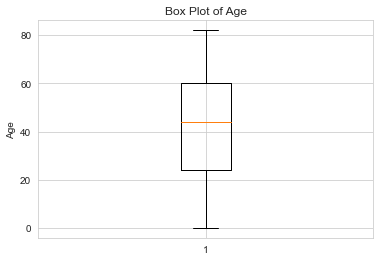

In [38]:
# Look at age data set and compute quantiles
age = input_csv["age"]

fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot of Age')
ax1.set_ylabel('Age')
ax1.boxplot(age)
plt.show()

In [39]:
# Get quartile calculations
quartiles = age.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of age is: {lowerq}")
print(f"The upper quartile of age is: {upperq}")
print(f"The interquartile range of age is: {iqr}")
print(f"The the median of age is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of age is: 24.0
The upper quartile of age is: 60.0
The interquartile range of age is: 36.0
The the median of age is: 44.0 
Values below -30.0 could be outliers.
Values above 114.0 could be outliers.


In [40]:
# Create a subset data frame
subset_df = input_csv[((input_csv["id"] >= 36250) & (input_csv["id"] <= 36450))]

subset_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi group,bmi group 2
28,36275,Female,54.0,0,0,Yes,Private,Rural,206.72,26.7,never smoked,0,25-29.9,Overweight
303,36331,Male,18.0,0,0,No,Private,Rural,70.34,24.2,unknown,0,18.5-24.9,Normal weight
391,36355,Male,58.0,0,0,Yes,Govt_job,Rural,111.73,34.6,never smoked,0,30-34.9,Obese Class I (Moderately obese)
1911,36377,Female,44.0,0,0,Yes,Private,Rural,222.29,38.2,never smoked,0,35-39.9,Obese Class II (Severely obese)
2183,36317,Female,41.0,0,0,Yes,Private,Rural,134.29,26.8,smokes,0,25-29.9,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42789,36428,Female,29.0,0,0,Yes,Private,Rural,68.11,25.1,smokes,0,25-29.9,Overweight
42863,36427,Male,26.0,0,0,Yes,Private,Urban,104.01,31.1,formerly smoked,0,30-34.9,Obese Class I (Moderately obese)
43063,36423,Female,74.0,0,0,Yes,Self-employed,Rural,136.82,34.3,unknown,0,30-34.9,Obese Class I (Moderately obese)
43256,36301,Female,38.0,0,0,Yes,Private,Rural,68.85,17.3,never smoked,0,<18.5,Underweight


## Basic analysis of the subset dataset

## gender

In [41]:
# Overview of gender
subset_df["gender"].value_counts()

Female    64
Male      50
Name: gender, dtype: int64

## age

In [42]:
# Overview of age
subset_df["age"].value_counts()

63.00    5
58.00    5
65.00    5
54.00    4
2.00     4
29.00    4
68.00    4
82.00    3
12.00    3
35.00    3
46.00    3
18.00    3
36.00    3
62.00    2
48.00    2
45.00    2
11.00    2
44.00    2
26.00    2
64.00    2
41.00    2
66.00    2
25.00    2
61.00    2
72.00    2
15.00    2
77.00    2
76.00    2
79.00    2
39.00    2
3.00     2
42.00    2
50.00    1
30.00    1
51.00    1
1.72     1
59.00    1
20.00    1
1.32     1
38.00    1
74.00    1
9.00     1
31.00    1
55.00    1
19.00    1
32.00    1
34.00    1
21.00    1
52.00    1
24.00    1
56.00    1
33.00    1
22.00    1
49.00    1
37.00    1
28.00    1
43.00    1
1.08     1
70.00    1
Name: age, dtype: int64

## hypertension

In [43]:
# Overview of hypertension
subset_df["hypertension"].value_counts()

0    96
1    18
Name: hypertension, dtype: int64

## heart_disease

In [44]:
# Overview of heart_disease
subset_df["heart_disease"].value_counts()

0    110
1      4
Name: heart_disease, dtype: int64

## ever_married

In [45]:
# Overview of ever_married
subset_df["ever_married"].value_counts()

Yes    75
No     39
Name: ever_married, dtype: int64

## work_type

In [46]:
# Overview of work_type
subset_df["work_type"].value_counts()

Private          66
Self-employed    19
children         17
Govt_job         12
Name: work_type, dtype: int64

## Residence_type

In [47]:
# Overview of Residence_type
subset_df["Residence_type"].value_counts()

Rural    62
Urban    52
Name: Residence_type, dtype: int64

## avg_glucose_level

In [48]:
# Overview of avg_glucose_level
subset_df["avg_glucose_level"].value_counts()

65.09     2
58.01     1
100.67    1
70.69     1
60.58     1
         ..
103.21    1
71.19     1
61.40     1
218.83    1
67.50     1
Name: avg_glucose_level, Length: 113, dtype: int64

## bmi

In [49]:
# Overview of bmi
subset_df["bmi"].value_counts()

25.3    2
26.1    2
20.6    2
26.6    2
24.5    2
       ..
20.3    1
26.7    1
35.9    1
41.7    1
26.5    1
Name: bmi, Length: 101, dtype: int64

In [50]:
# Null bmi

print(subset_df["bmi"].isnull().sum())

0


In [51]:
input_csv["bmi"].max()

97.6

## smoking_status

In [52]:
# Overview of smoking_status
subset_df["smoking_status"].value_counts()

never smoked       49
unknown            36
smokes             15
formerly smoked    14
Name: smoking_status, dtype: int64

In [53]:
# Null smoking_status

print(subset_df["smoking_status"].isnull().sum())

0


## stroke

In [54]:
# Overview of stroke
subset_df["stroke"].value_counts()

0    109
1      5
Name: stroke, dtype: int64

In [55]:
# Creating a group based off of the bins
subset_bmi_group2 = subset_df.groupby("bmi group 2")
subset_bmi_group2[["stroke", "hypertension", "heart_disease"]].sum()

,stroke,hypertension,heart_disease
bmi group 2,,,
unknown,0,0,0
Underweight,0,0,0
Normal weight,0,1,0
Overweight,2,8,3
Obese Class I (Moderately obese),0,3,1
Obese Class II (Severely obese),2,3,0
Obese Class III (Very severely obese),1,2,0
Obese Class IV (Morbidly Obese),0,0,0
Obese Class V (Super Obese),0,1,0
